In [171]:
# affichage des rectifications à faire pour être PEP8 compliant
# %load_ext pycodestyle_magic
# %pycodestyle_off

In [172]:
# librairies de base
import pandas as pd
import numpy as np
import warnings
from haversine import haversine, Unit
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [173]:
# librairies de dataviz
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [174]:
# Chargement des données
data_customers = pd.read_csv('olist_customers_dataset.csv')
data_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_orders = pd.read_csv('olist_orders_dataset.csv')
data_products = pd.read_csv('olist_products_dataset.csv')
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
data_category_name = pd.read_csv('product_category_name_translation.csv')

# Overview

In [175]:
print(data_customers.shape)
data_customers.head(2)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [176]:
print('customer_id :',
      data_customers.customer_id.unique().shape[0],
      '\ncustomer_unique_id :',
      data_customers.customer_unique_id.unique().shape[0])

customer_id : 99441 
customer_unique_id : 96096


<AxesSubplot:xlabel='customer_state', ylabel='count'>

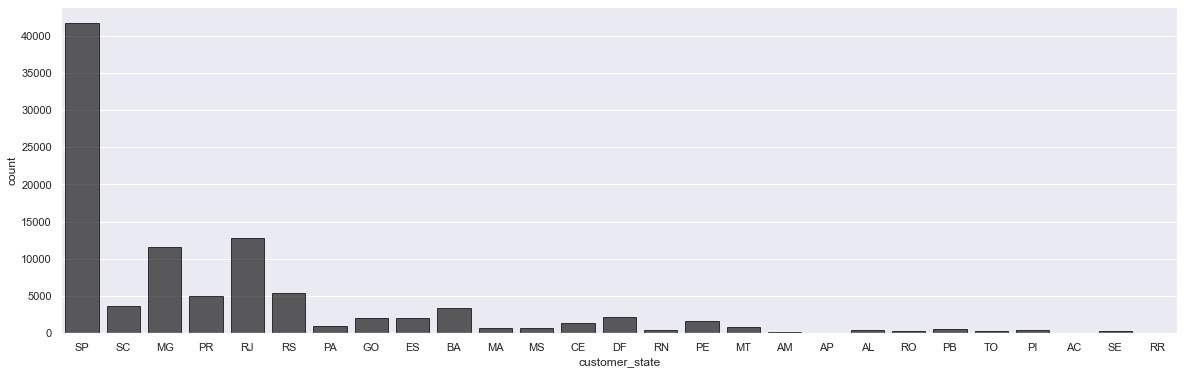

In [177]:
plt.figure(figsize=(20, 6))
# Répartition par État
sns.countplot(data=data_customers,
              x="customer_state",
              edgecolor="black",
              color="k",
              alpha=0.7)

- customer_id : *Identifiant de la commande d'un client* (**Essentiel**)
- customer_unique_id : *Identifiant unique du client* (**Essentiel**)
- customer_zip_code_prefix : *Code Postal du client* (**Essentiel**)
- customer_city : *Ville d'origine du client* (**Non essentiel**)
- customer_state : *Etat d'origine du client* (**Essentiel**)

In [178]:
print(data_geolocation.shape)
data_geolocation.head(2)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


- geolocation_zip_code_prefix : *Code Postal de la transaction* (**Essentiel**)
- geolocation_lat : *Latitude où à été effectué la transaction* (**Essentiel**)
- geolocation_lng : *Longitude où à été effectué la transaction* (**Essentiel**)
- geolocation_city : *Ville où à été effectué la transaction* (**Non essentiel**)
- geolocation_state : * Code Postal où à été effectué la transaction* (**Essentiel**)

In [179]:
print(data_order_items.shape)
data_order_items.head(2)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


- order_id : *identifiant unique de la commande* (**Essentiel**)
- order_item_id : *Nième article achetés du panier* (**Essentiel**)
- product_id : *Identifiant du produit* (**Essentiel**)
- seller_id : *Identifiant du vendeur* (**Essentiel**)
- shipping_limit_date : *Date maximale à laquelle le produit est expedié de l'entrepôt* (**Non Essentiel**)
- price : *Prix du produit* (**Essentiel**)
- freight_value : *Coût de transport du Nième article* (**Essentiel**)

In [180]:
data_order_payments[data_order_payments.order_id == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.41


In [181]:
print(data_order_payments.shape)
data_order_payments.head(2)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


<AxesSubplot:xlabel='payment_installments', ylabel='count'>

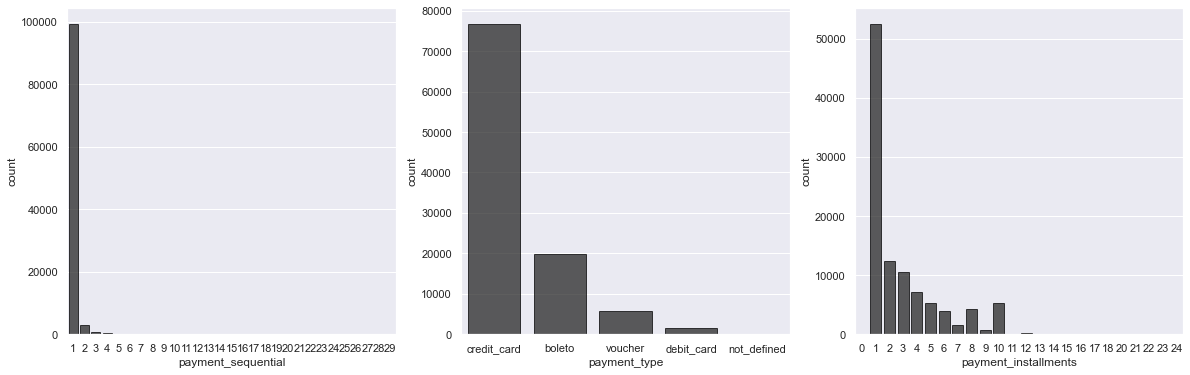

In [182]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# Répartition du nombre de moyens de paiements moyen pour une transaction
sns.countplot(data=data_order_payments, x="payment_sequential",
              edgecolor="black",
              color="k",
              alpha=0.7,
              ax=ax1)
# Répartition des moyens de paiement
sns.countplot(data=data_order_payments,
              x="payment_type",
              edgecolor="black",
              color="k",
              alpha=0.7,
              ax=ax2)
# Répartition du nombre de paiements pour une transaction
sns.countplot(data=data_order_payments,
              x="payment_installments",
              edgecolor="black",
              color="k",
              alpha=0.7,
              ax=ax3)

- order_id : *identifiant unique de la commande* (**Essentiel**)
- payment_sequential : *Nième moyen de paiement utilisé* (**Non essentiel**)
- payment_type : *Moyen de paiement* (**Non Essentiel**)
- payment_installments : *Nombre de versements choisis* (**Non Essentiel**)
- payment_value : *Montant du panier* (**Essentiel**)

In [183]:
print(data_order_reviews.shape)
data_order_reviews.head(2)

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


- review_id : *Identifiant de l'avis client* (**Non essentiel**)
- order_id : *identifiant unique de la commande* (**Essentiel**)
- review_score : *Nombre d'étoiles sur 5 donné à la commande* (**Essentiel**)
- review_comment_title : *Titre de l'avis* (**Non essentiel**)
- review_comment_message : *Contenu de l'avis* (**Essentiel**)
- review_creation_date : Création de l'avis* (**Non essentiel**)
- review_answer_timestamp : *Date de réponse de la plateforme* (**Non essentiel**)

In [184]:
print(data_orders.shape)
data_orders.head(2)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


- order_id : *identifiant unique de la commande* (**Essentiel**)
- customer_id : *Identifiant du client* (**Essentiel**)
- order_status : *Statut de la commande* (**Essentiel**)
- order_purchase_timestamp : *Date d'achat* (**Essentiel**)
- order_approved_at : *Date d'approbation de la commande par la plateforme* (**Non essentiel**)
- order_delivered_carrier_date : *Date de prise en charge par le transporteur* (**Non essentiel**)
- order_delivered_customer_date : *Date effective de livraison* (**Essentiel**)
- order_estimated_delivery_date : *Date estimée de livraison* (**Essentiel**)

In [185]:
print(data_products.shape)
data_products.head(2)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


- product_id : *Identifiant du produit* (**Essentiel**)
- product_category_name : *Catégorie de produit* (**Essentiel**)
- product_name_lenght : *Longueur du nom du produit* (**Non essentiel**)
- product_description_lenght : *Longueur de la description du produit* (**Non essentiel**)
- product_photos_qty : *Nombre de photos du produit* (**Non essentiel**)
- product_weight_g : *Poids du produit* (**Non essentiel**)
- product_length_cm : *Longueur du produit* (**Non essentiel**)
- product_height_cm : *Hauteur du produit* (**Non essentiel**)
- product_width_cm : *Profondeur du produit* (**Non essentiel**)

In [186]:
print(data_sellers.shape)
data_sellers.head(2)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


- seller_id : *Identifiant du vendeur* (**Essentiel**)
- seller_zip_code_prefix : *Code Postal du vendeur* (**Non essentiel**)
- seller_city : *Ville du vendeur* (**Non essentiel**)
- seller_state : *État du vendeur* (**Essentiel**)

In [187]:
print(data_category_name.shape)
data_category_name.head(2)

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


- product_category_name : *Catégorie de produit* (**Essentiel**)
- product_category_name : *Catégorie de produit traduite en anglais* (**Essentiel**)

## Dimensions

In [188]:
# Noms des différents jeux de données
liste_df = [data_customers,
            data_geolocation,
            data_order_items,
            data_order_payments,
            data_order_reviews,
            data_orders,
            data_products,
            data_sellers,
            data_category_name]

noms_df = ['data_customers',
           'data_geolocation',
           'data_order_items',
           'data_order_payments',
           'data_order_reviews',
           'data_orders',
           'data_products',
           'data_sellers',
           'data_category_name']

In [189]:
# Longueur de chaque jeu de données
for df, name in zip(liste_df, noms_df):
    print(name, df.shape[0])

data_customers 99441
data_geolocation 1000163
data_order_items 112650
data_order_payments 103886
data_order_reviews 99224
data_orders 99441
data_products 32951
data_sellers 3095
data_category_name 71


## Traitement des NaN

In [190]:
# Nombre de données non renseignées par jeu de données (Not A Number = NaN = cellule vide)
for df, nom in zip(liste_df, noms_df):
    print(nom,
          "contient {:.2f}% de NaN".format(
              df.isna().sum().sum()/df.shape[0]/df.shape[1]))

data_customers contient 0.00% de NaN
data_geolocation contient 0.00% de NaN
data_order_items contient 0.00% de NaN
data_order_payments contient 0.00% de NaN
data_order_reviews contient 0.21% de NaN
data_orders contient 0.01% de NaN
data_products contient 0.01% de NaN
data_sellers contient 0.00% de NaN
data_category_name contient 0.00% de NaN


In [191]:
# NaN du order_reviews : section commentaires non renseignés
# data_order_reviews.drop(['review_comment_title','review_comment_message'],axis=1)
data_order_reviews['review_comment_title'].fillna(' ', inplace=True)
data_order_reviews['review_comment_message'].fillna(' ', inplace=True)
data_order_reviews.isna().sum(axis=0)

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [192]:
# NaN du data_orders
data_orders['order_delivered_customer_date'].fillna(0, inplace=True)
data_orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

In [193]:
# NaN du data_products
data_products.product_category_name.fillna('Unknown', inplace=True)
data_products.isna().sum(axis=0)

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Corrections et suppressions

In [194]:
# Suppression des variables inutiles
data_customers.drop(['customer_city',
                     'customer_zip_code_prefix'], axis=1, inplace=True)

In [195]:
# Suppression des doublons
data_geolocation.drop_duplicates(inplace=True)
# Groupement des données
data_geolocation = data_geolocation.groupby(['geolocation_state']).mean()
# Suppression des variables inutiles
data_geolocation.drop(['geolocation_zip_code_prefix'],
                      axis=1,
                      inplace=True)

In [196]:
# Suppression des variables inutiles
data_order_items.drop(['shipping_limit_date'],
                      axis=1,
                      inplace=True)

In [197]:
# Suppression des variables inutiles
data_order_payments.drop(['payment_sequential'],
                         axis=1,
                         inplace=True)

In [198]:
# Suppression des variables inutiles
data_order_reviews.drop(['review_id',
                         'review_comment_title',
                         'review_creation_date',
                         'review_answer_timestamp'],
                        axis=1,
                        inplace=True)

In [199]:
# Conservation des données utiles uniquement
data_orders = data_orders[
     data_orders.order_status == "delivered"]
# Modification du format des données
data_orders['order_purchase_timestamp'] = data_orders[
    'order_purchase_timestamp'].astype('datetime64')
# Modification du format des données
data_orders['order_estimated_delivery_date'] = data_orders[
    'order_estimated_delivery_date'].astype('datetime64')
# Modification du format des données
data_orders['order_delivered_customer_date'] = pd.to_datetime(
     data_orders['order_delivered_customer_date'],
     errors='coerce')
# Suppression des variables inutiles
data_orders.drop(['order_status',
                  'order_approved_at',
                  'order_delivered_carrier_date'],
                 axis=1,
                 inplace=True)

In [200]:
# Suppression des variables inutiles
data_products.drop(['product_name_lenght',
                    'product_description_lenght',
                    'product_photos_qty',
                    'product_weight_g',
                    'product_length_cm',
                    'product_height_cm',
                    'product_width_cm'],
                   axis=1,
                   inplace=True)

In [201]:
# Suppression des variables inutiles
data_sellers.drop(['seller_city',
                   'seller_zip_code_prefix'],
                  axis=1,
                  inplace=True)

## Merge des différents jeux de données

In [202]:
# Fusion des commandes, avis et contenu des commandes
df_1 = data_order_items.merge(
    data_order_payments,
    on='order_id'
    ).merge(
        data_order_reviews,
        on='order_id'
        ).merge(data_orders,
                on='order_id',
                how='right'
                )

In [203]:
df_1.shape

(115506, 15)

In [204]:
# Fusion des commandes et des clients associés
df_2 = df_1.merge(data_customers,
                  on='customer_id',
                  how='left'
                  )

In [205]:
df_2.shape

(115506, 17)

In [206]:
# Fusion des clients et de leur geolocalisation
df_3 = df_2.merge(data_geolocation,
                  left_on='customer_state',
                  right_on='geolocation_state',
                  how='right'
                  )

In [207]:
df_3.shape

(115506, 19)

In [208]:
# Fusion des commandes et des vendeurs associés
data = df_3.merge(data_sellers,
                  on='seller_id',
                  how='right'
                  )

In [211]:
data.shape

(114859, 20)

# Overview 2

In [212]:
# Nombre d'index pour chaque étape du merge
concat = [df_1,
          df_2,
          df_3,
          data]
concat_name = ['df_1',
           'df_2',
           'df_3',
           'data']
for df, name in zip(concat, concat_name):
    print('{}'.format(name),
          df.shape[0]
          )

df_1 115506
df_2 115506
df_3 115506
data 114859


In [213]:
# Format des données de chaque colonne
data.dtypes

order_id                                 object
order_item_id                           float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                            float64
review_comment_message                   object
customer_id                              object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_state                           object
geolocation_lat                         float64
geolocation_lng                         float64
seller_state                             object
dtype: object

In [214]:
data.drop([
           'review_comment_message',
           'order_item_id',
           'seller_id',
           'freight_value',
           'payment_type',
           'payment_installments',
           'payment_value',
           'review_comment_message',
           'customer_state',
           'seller_state'
           ],
          axis=1,
          inplace=True)

In [215]:
# Export du dataset final pour la
# simulation d'obsolescence du modèle
data.to_csv("dataset_simulation.csv")

# Variables finales

In [228]:
data.drop_duplicates(subset=['customer_id'],
                     inplace=True)

In [229]:
data.shape[0]

95831

In [230]:
# Coordonnées de l'entrepôt
olist = (-25.43045, -49.29207)

# Modification au format datetime
data['order_purchase_timestamp'] = data[
    'order_purchase_timestamp'].astype('datetime64')

# Modification au format datetime
data['order_estimated_delivery_date'] = data[
    'order_estimated_delivery_date'].astype('datetime64')

# Modification au format datetime
data['order_delivered_customer_date'] = pd.to_datetime(
    data['order_delivered_customer_date'],
    errors='coerce')

In [239]:
def FeatureEngineering(data):
    
    '''
    Fonction permettant de refaire un feature
    engineering sur mesure pour tout DataFrame en input
    '''
    
    # Création d'un dataframe vide
    final_data = pd.DataFrame()
    
    # last_day_purchase
    final_data['last_day_purchase'] = (
        data.order_purchase_timestamp.max()
        - data.groupby('customer_unique_id')[
            'order_purchase_timestamp'].max()).apply(
        lambda x: x.days)
    
    # mean_delay
    final_data['mean_delay'] = (
        data.groupby('customer_unique_id')[
            'order_estimated_delivery_date'].mean()
        - data.groupby('customer_unique_id')[
            'order_delivered_customer_date'].mean()).apply(
        lambda x: x.days)
    
    # warehouse_distance
    final_data['warehouse_distance'] = data.groupby(
        'customer_unique_id')[
        ['geolocation_lat','geolocation_lng']
    ].mean().apply(
        lambda x: haversine(
            (x['geolocation_lat'],
             x['geolocation_lng']),
             olist),
        axis=1)
    
    # command_nb
    final_data['command_nb'] = data.groupby(
        ['customer_unique_id']
    )['customer_unique_id'].count()
    
    # mean_basket
    final_data['mean_basket'] = data.groupby(
        ['customer_unique_id','order_id'])[
        'price'].mean().groupby(
        ['customer_unique_id']).mean()
    
    # max_product_price
    final_data['max_product_price'] = data.groupby(
        ['customer_unique_id'])['price'].max()
    
    # total_spent
    final_data['total_spent'] = data.groupby(
        ['customer_unique_id'])['price'].sum()
    
    # mean_review_note
    final_data['mean_review_note'] = data.groupby(
        ['customer_unique_id'])['review_score'].mean()

    final_data['last_weekday_purchase'] = data.groupby(
        ['customer_unique_id'])['order_purchase_timestamp'].max().apply(
    lambda x: x.weekday())
    
    # Traitement des valeurs abérrantes
    final_data = final_data[final_data['mean_delay'] < 1000]
    final_data = final_data[final_data['mean_delay'] > 0]
    
    return final_data

# Finalisation du jeu de données final

In [240]:
data_final = FeatureEngineering(data)

In [241]:
# Liste des colonnes retenues
data.columns.tolist()

['order_id',
 'product_id',
 'price',
 'review_score',
 'customer_id',
 'order_purchase_timestamp',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'geolocation_lat',
 'geolocation_lng']

In [242]:
data_final.shape[0]

83962

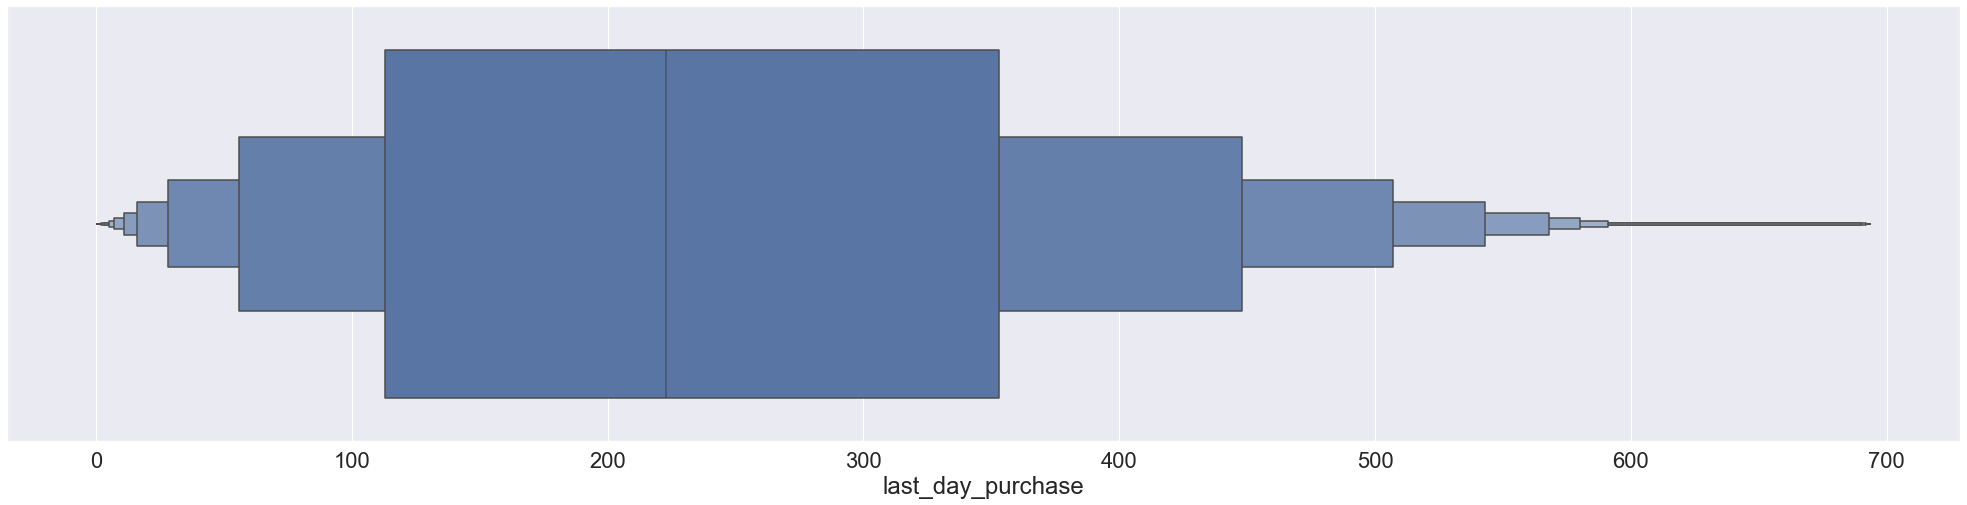

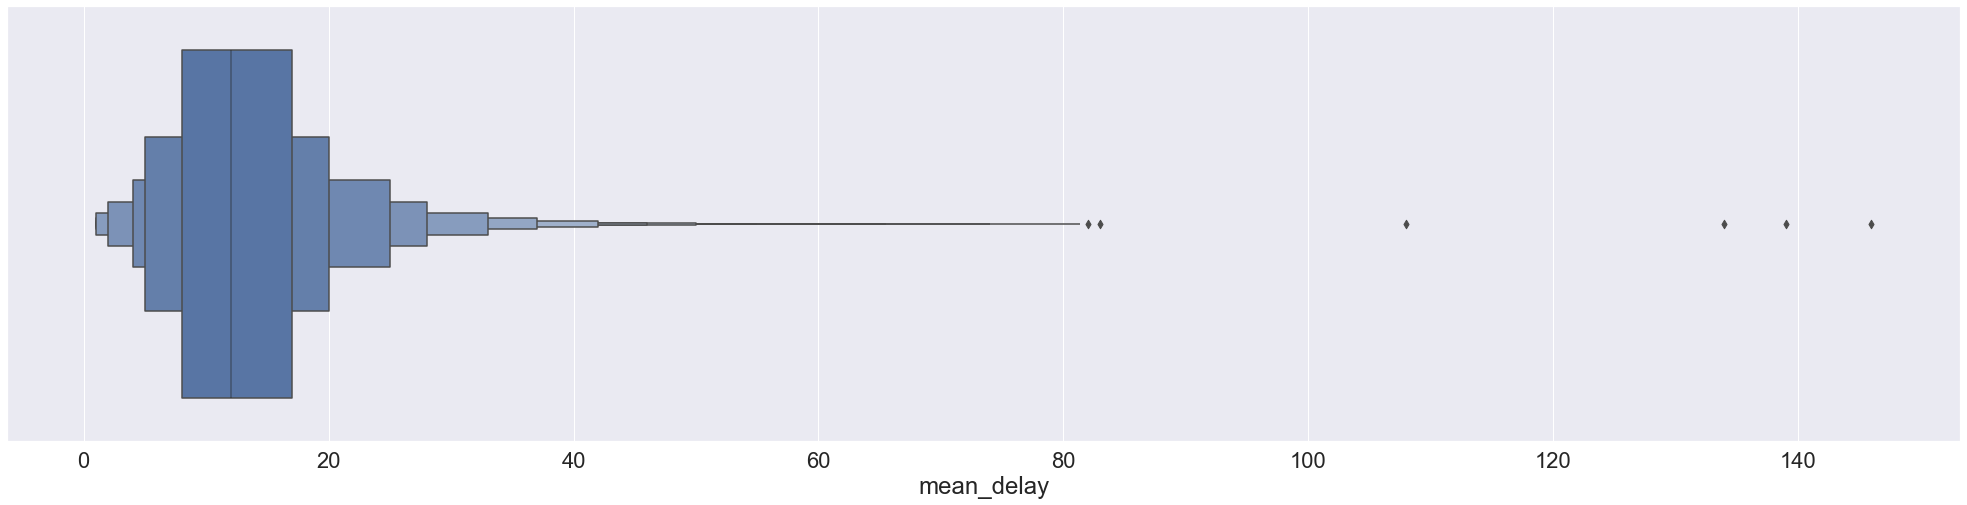

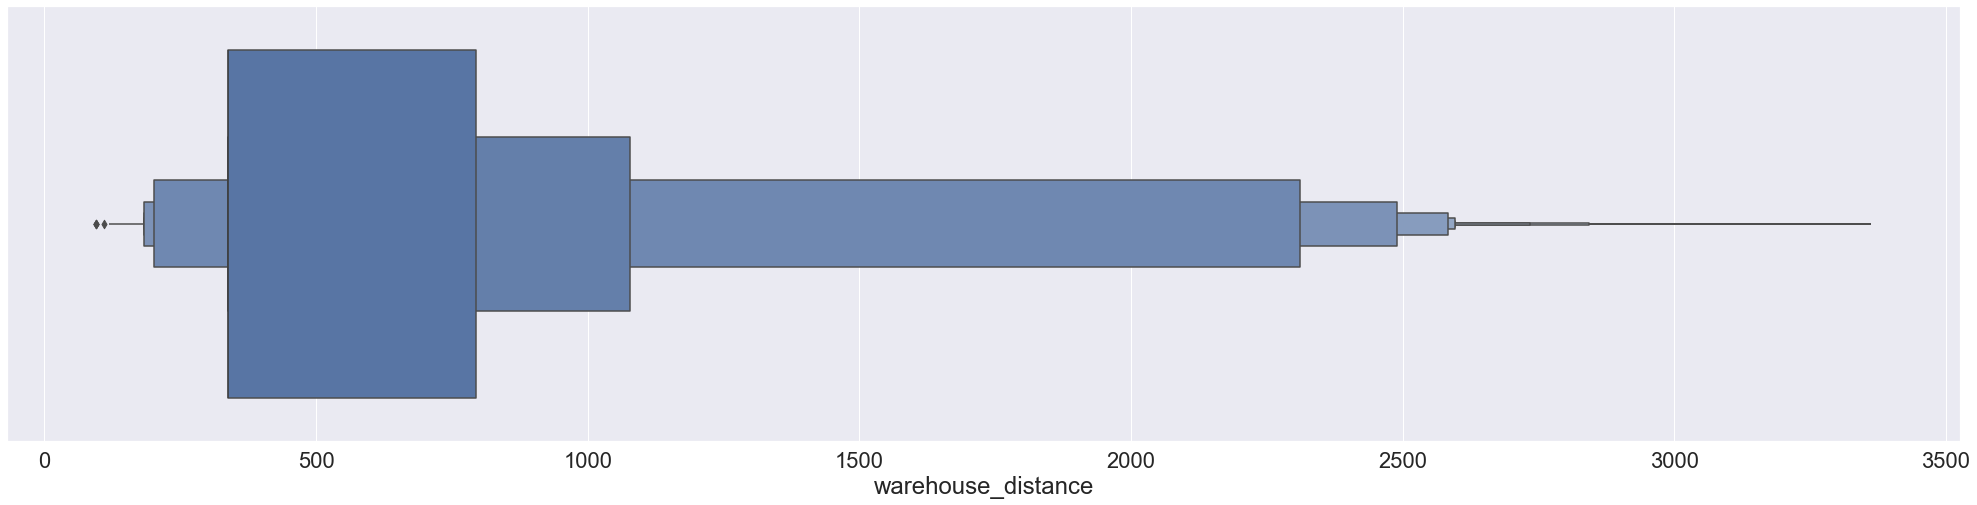

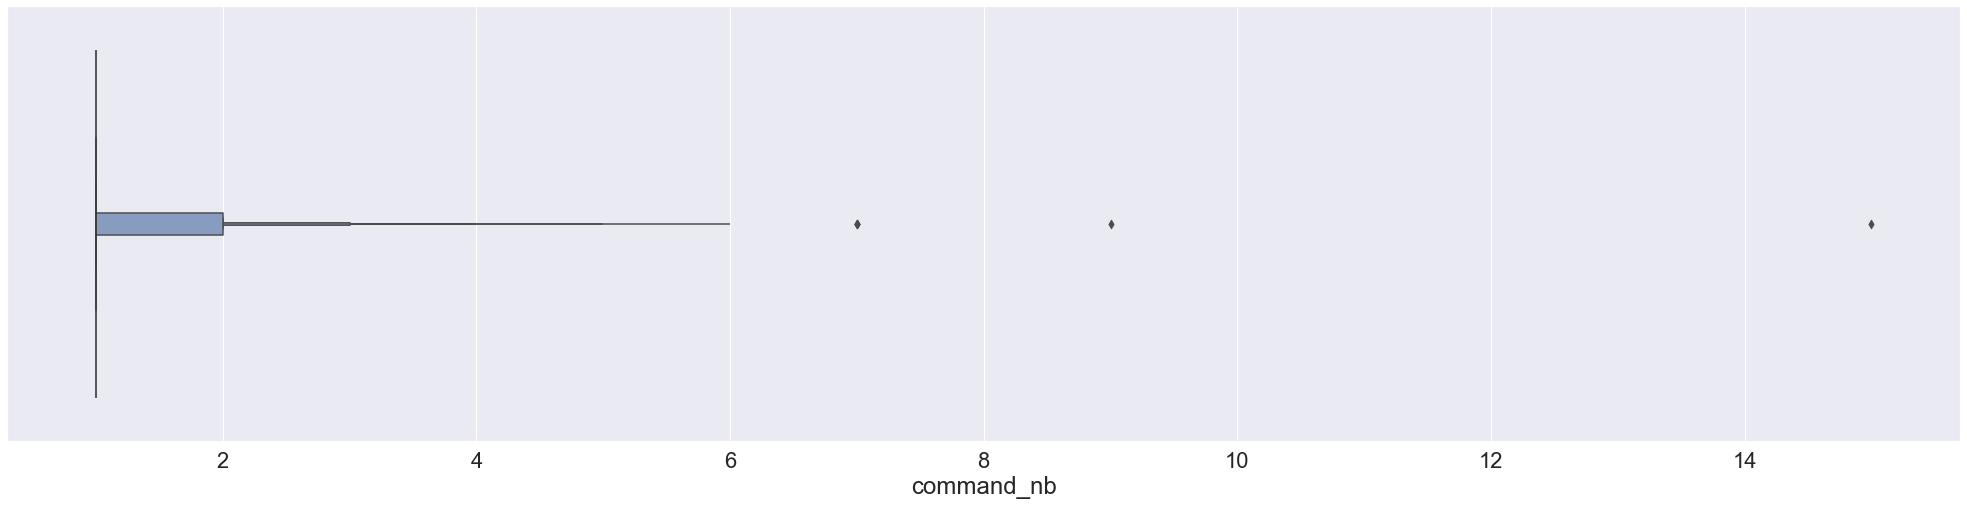

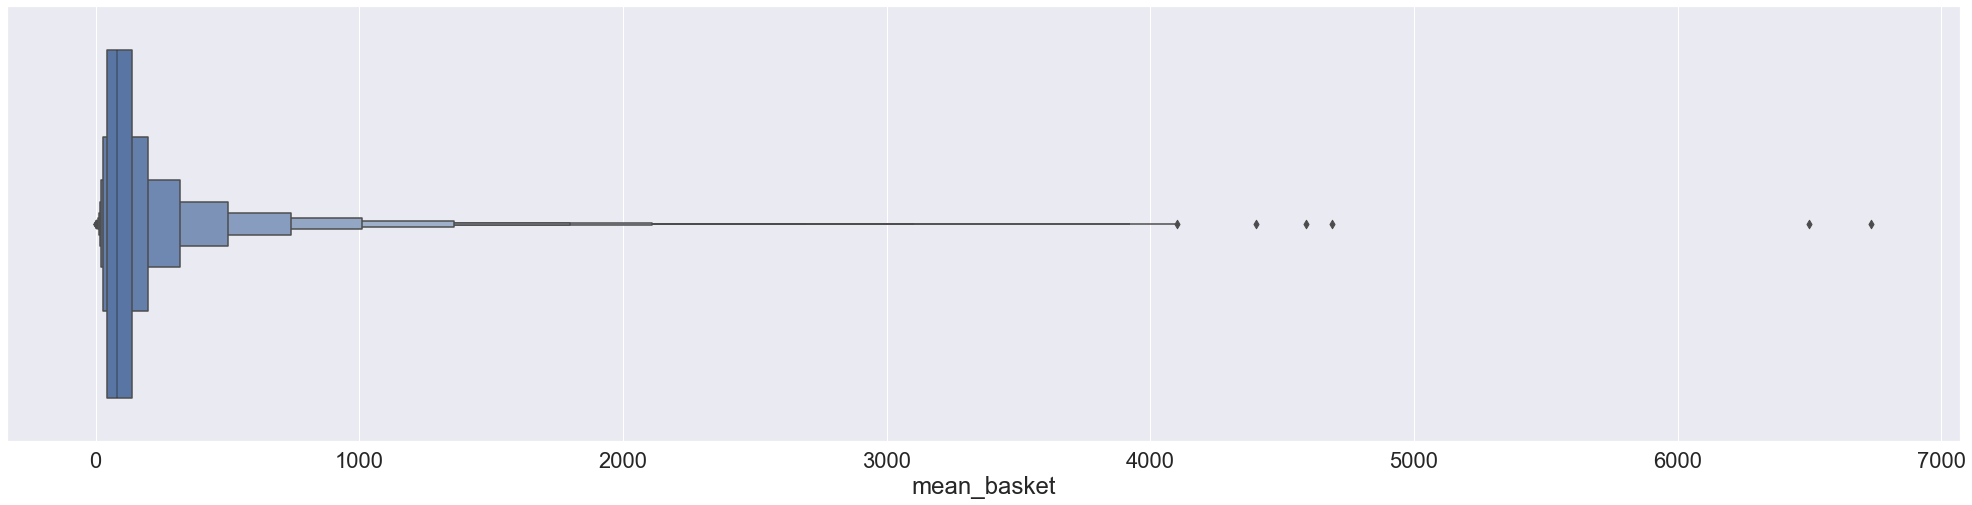

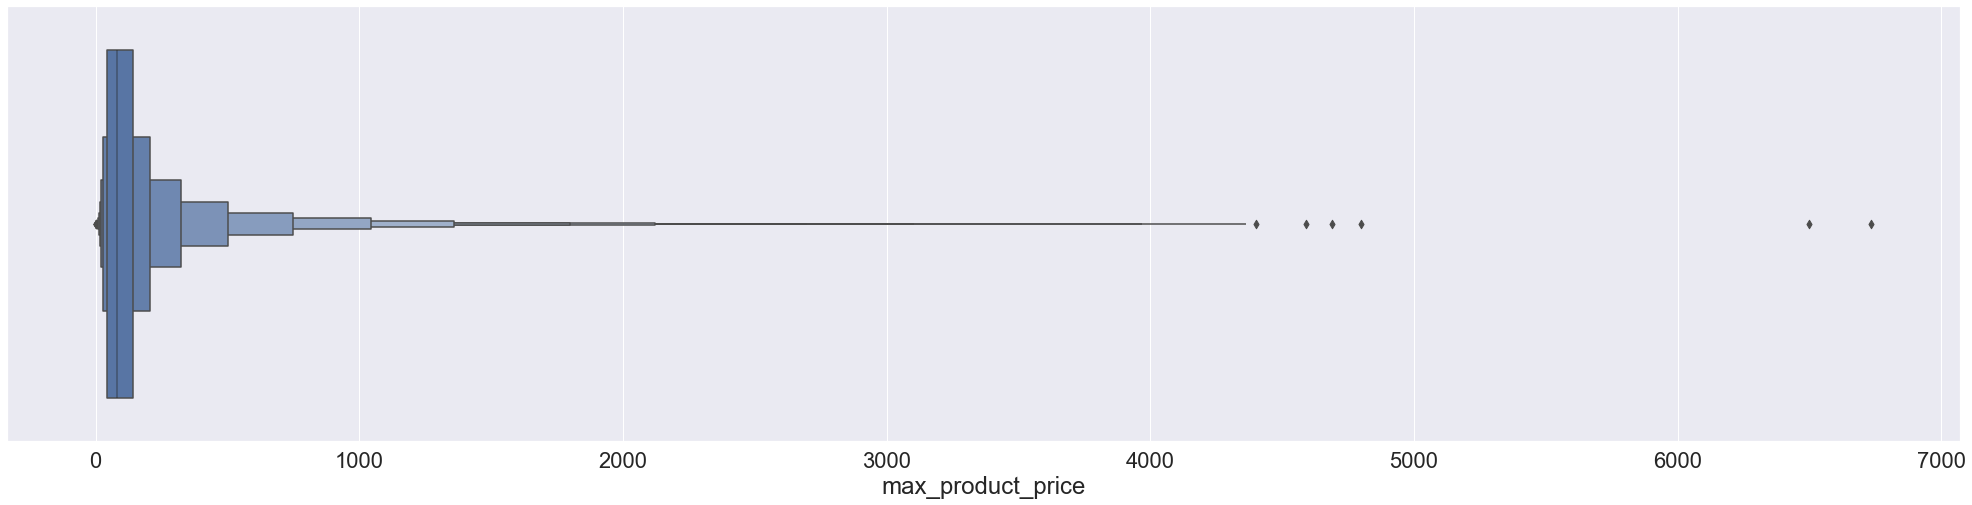

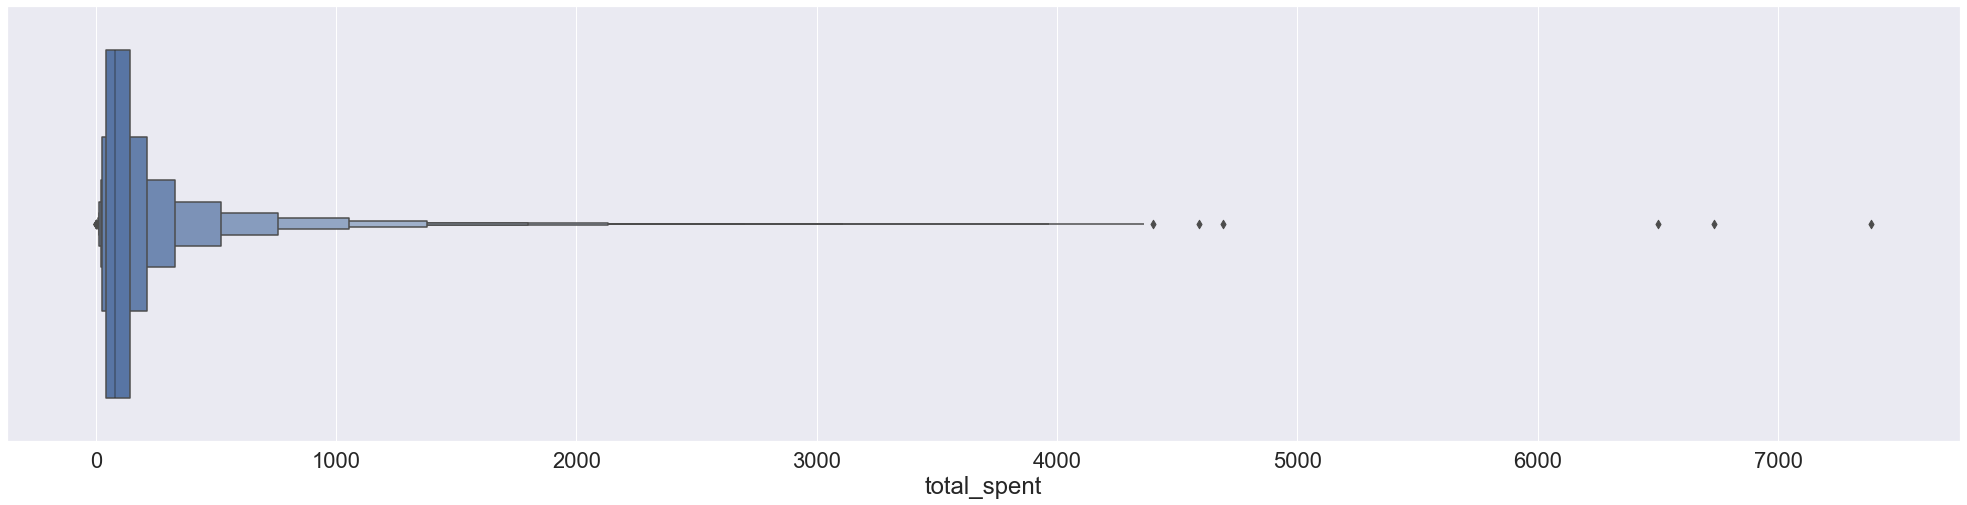

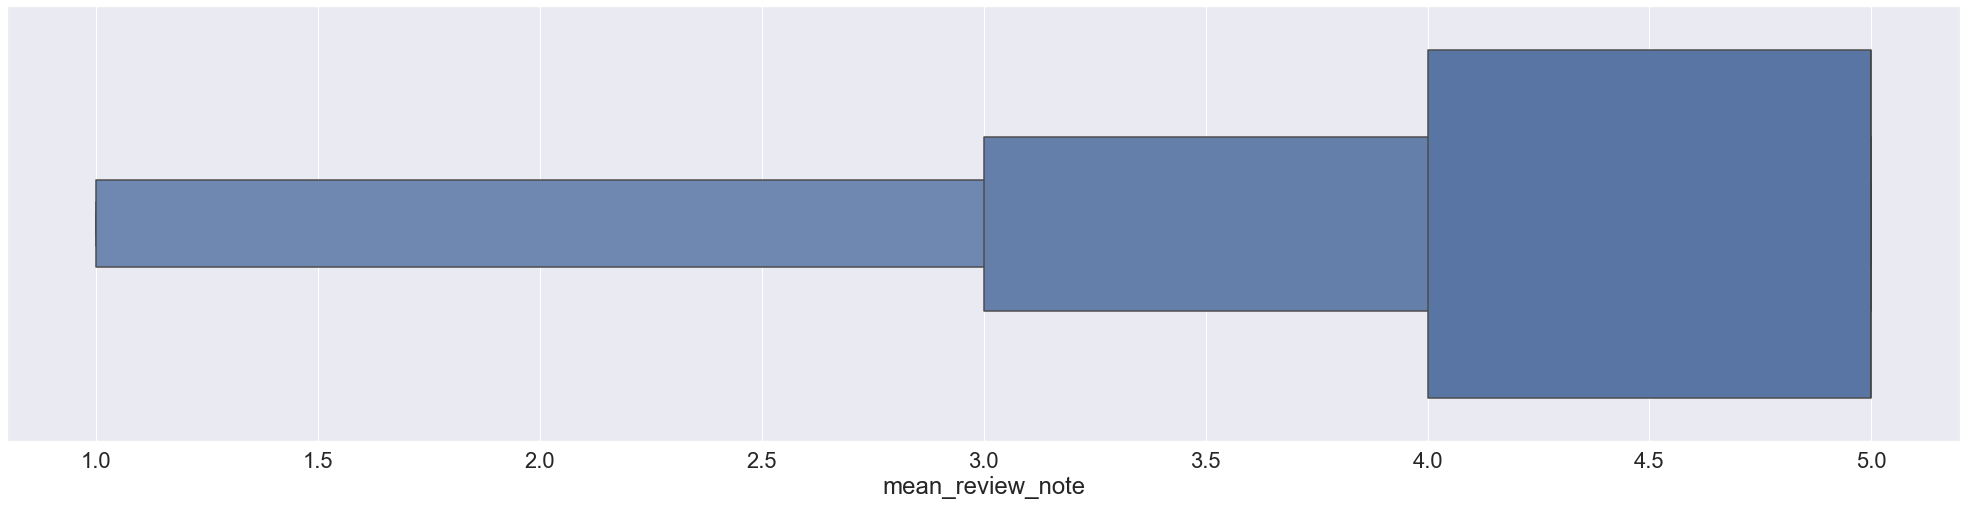

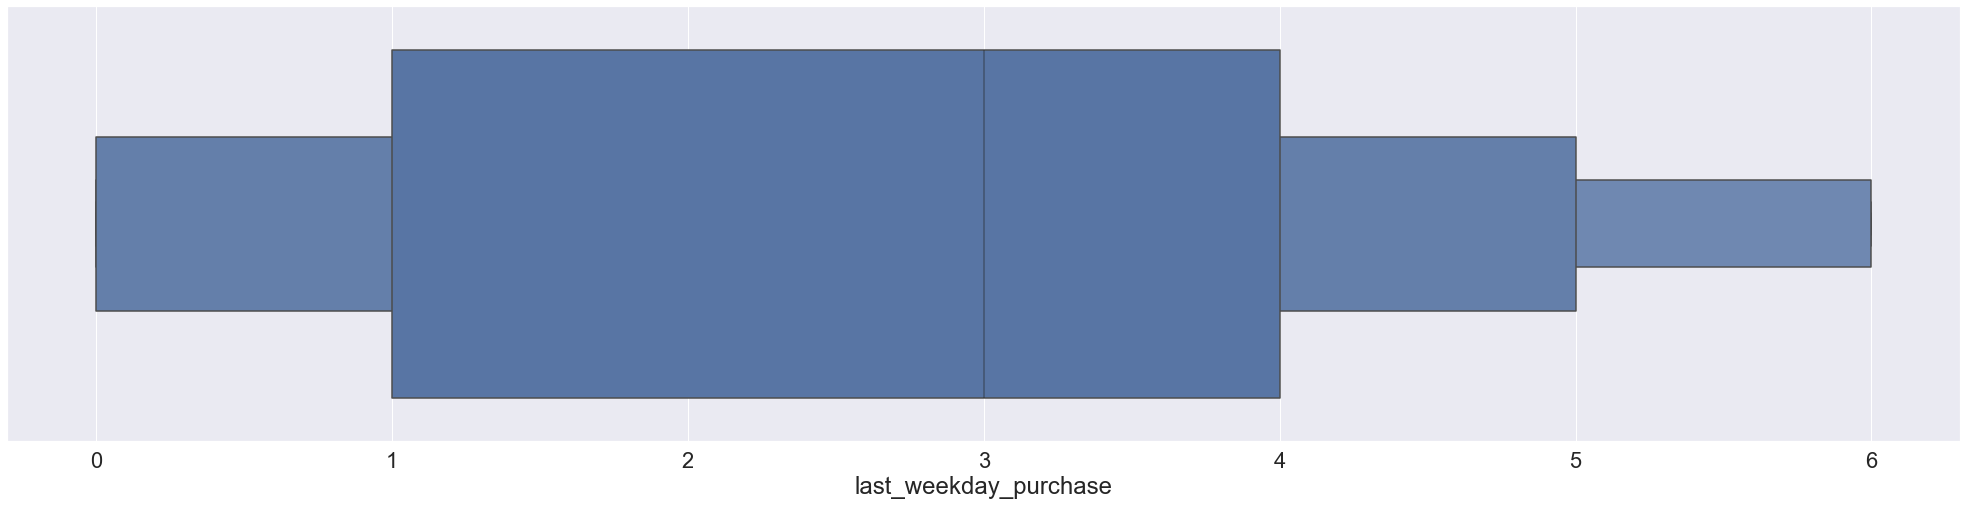

In [243]:
# Afficher la répartition numériques des features
sns.set(font_scale=2)
for col in data_final.columns.tolist():
    plt.figure(figsize = (35,8))
    sns.boxenplot(data_final[col])
    plt.xlabel(col)
    plt.show()
sns.set(font_scale=1)

## Export des données

In [244]:
# Export au format CSV sous le nom 'cleaned_dataset'
data_final.to_csv("cleaned_dataset.csv")